In [ ]:
# Installing Dependencies
!pip install qiskit==0.43.1 qiskit-aer==0.12.0 matplotlib==3.7.1 --force-reinstall --quiet


In [2]:
# Imports
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


In [3]:
# Creating a Bell state to simulate polarization entanglement
qc = QuantumCircuit(2, 2)
qc.h(0)         # Create superposition on qubit 0
qc.cx(0, 1)     # Entangle qubit 0 and 1
qc.barrier()


Correlation rate (ideal is 100%):
100.00%
Interpretation: In the Z-basis (Horizontal/Vertical), we see strong correlation — if one qubit is 0 (H), the other is also 0; same for 1 (V).


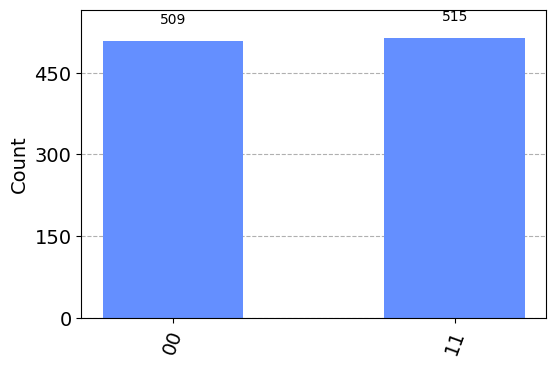

In [18]:
# Measuring in Z-basis (standard basis = Horizontal/Vertical polarization)
qc.measure([0, 1], [0, 1])

# Simulating the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=simulator, shots=1024)
result = job.result()
counts = result.get_counts()

#Z-basis measurement plot, correlation rate and explanation
print("Correlation rate (ideal is 100%):")
total = sum(counts.values())
correlated = counts.get('00', 0) + counts.get('11', 0)
print(f"{correlated / total * 100:.2f}%")

print("Interpretation: In the Z-basis (Horizontal/Vertical), we see strong correlation — if one qubit is 0 (H), the other is also 0; same for 1 (V).")
plot_histogram(counts, sort='asc', figsize=(6, 4))

Correlation rate (ideal is 100%):
100.00%
Interpretation: In the X-basis (Diagonal/Anti-diagonal), we expect similar correlation — if one qubit is 0 (D), the other is also 0; same for 1 (A).


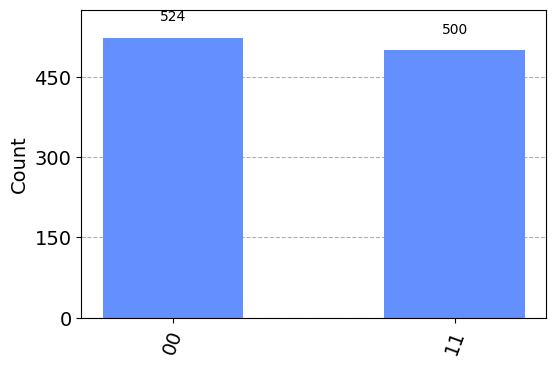

In [20]:
# Creating Bell state and measure in X-basis (D/A polarization)
qc_x = QuantumCircuit(2, 2)
qc_x.h(0)
qc_x.cx(0, 1)
qc_x.barrier()

# Applying H to rotate both qubits into X-basis
qc_x.h(0)
qc_x.h(1)
qc_x.measure([0, 1], [0, 1])

# Simulating and plotting
job_x = execute(qc_x, backend=simulator, shots=1024)
result_x = job_x.result()
counts_x = result_x.get_counts()

# X-basis measurement plot, correlation rate and explanation
print("Correlation rate (ideal is 100%):")
total_x = sum(counts_x.values())
correlated_x = counts_x.get('00', 0) + counts_x.get('11', 0)
print(f"{correlated_x / total_x * 100:.2f}%")

print("Interpretation: In the X-basis (Diagonal/Anti-diagonal), we expect similar correlation — if one qubit is 0 (D), the other is also 0; same for 1 (A).")
plot_histogram(counts_x, sort='asc', figsize=(6, 4))



Correlation rate (ideal is 0% for Bell Φ+):
0.00%
Interpretation: In the Y-basis (Right/Left circular), we expect anti-correlation — outcomes should ideally be 01 or 10, not 00 or 11.


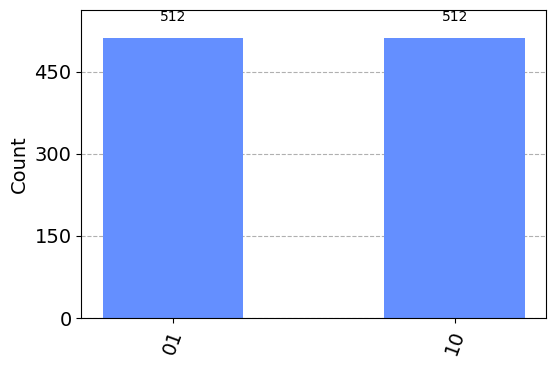

In [21]:
# Creating Bell state and measure in Y-basis (R/L circular polarization)
qc_y = QuantumCircuit(2, 2)
qc_y.h(0)
qc_y.cx(0, 1)
qc_y.barrier()

# Applying S† then H to rotate to Y-basis
qc_y.sdg(0)
qc_y.h(0)
qc_y.sdg(1)
qc_y.h(1)
qc_y.measure([0, 1], [0, 1])

# Simulating and plotting
job_y = execute(qc_y, backend=simulator, shots=1024)
result_y = job_y.result()
counts_y = result_y.get_counts()

# Y-basis measurement plot, correlation rate and explanation
print("Correlation rate (ideal is 0% for Bell Φ+):")
total_y = sum(counts_y.values())
correlated_y = counts_y.get('00', 0) + counts_y.get('11', 0)
print(f"{correlated_y / total_y * 100:.2f}%")

print("Interpretation: In the Y-basis (Right/Left circular), we expect anti-correlation — outcomes should ideally be 01 or 10, not 00 or 11.")
plot_histogram(counts_y, sort='asc', figsize=(6, 4))  # Show plot last



/tmp/ipython-input-22-1931931541.py:18: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


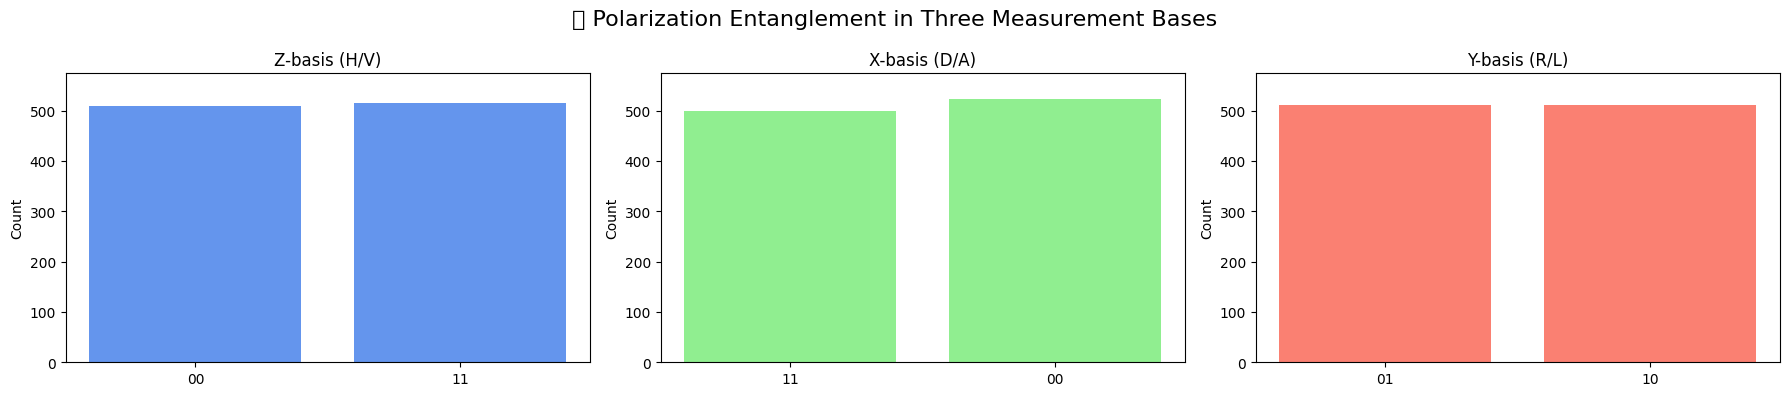

In [22]:
# Side-by-side comparison of all three bases
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

axs[0].bar(counts.keys(), counts.values(), color='cornflowerblue')
axs[0].set_title("Z-basis (H/V)")

axs[1].bar(counts_x.keys(), counts_x.values(), color='lightgreen')
axs[1].set_title("X-basis (D/A)")

axs[2].bar(counts_y.keys(), counts_y.values(), color='salmon')
axs[2].set_title("Y-basis (R/L)")

for ax in axs:
    ax.set_ylabel("Count")
    ax.set_ylim(0, max(max(counts.values()), max(counts_x.values()), max(counts_y.values())) + 50)

plt.suptitle("🔬 Polarization Entanglement in Three Measurement Bases", fontsize=16)
plt.tight_layout()
plt.show()
